In [9]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader
%matplotlib inline

## Defining Plots 📊

In [10]:
def get_hist(data_set,model):
    activations = model.activation(data_set.x)
    for i,activation in enumerate(activations):
        plt.hist(activation.numpy(),4,density=True)
        plt.title("Activation Layer"+str(i+1))
        plt.xlabel("Activation")
        plt.legend()
        plt.show()

In [17]:
def plotstuff(X,Y,model=None,leg=False):
    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label="training rate for 0")
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label="training rate for 1")
    
    if model!= None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='neural network')
    
    plt.legend()
    plt.show()

# Making our Data 📈

In [12]:
class data(Dataset):
    def __init__(self):
        self.x = torch.linspace(-20,20,100).view(-1,1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]>-10)&(self.x[:,0]<-5)] = 1
        self.y[(self.x[:,0]>5)&(self.x[:,0]<10)] = 1
        self.y = self.y.view(-1,1)
        self.len = self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len
        

# Creating a Simple Neural Network using nn.Module 🤖

In [13]:
class net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(net,self).__init__()
        self.linear1 = nn.Linear(D_in,H)
        self.linear2 = nn.Linear(H,D_out)
        
    def forward(self,x):
        x = torch.sigmoid(self.linear1(x))
        x = torch.sigmoid(self.linear2(x))
        return x

# Trainig our model 🤖

In [14]:
def train(data_set,model,criterion,train_loader,optimizer,epoch=5,plot_number=10):
    cost = []
    
    for epoch in range(epoch):
        total = 0
        
        for x,y in train_loader:
            optimizer.zero_grad()
            
            yhat = model(x)
            loss = criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total += loss.item()
        
        if epoch%plot_number == 0:
            plotstuff(data_set.x,data_set.y,model)
            
            cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

In [15]:
data_set = data()

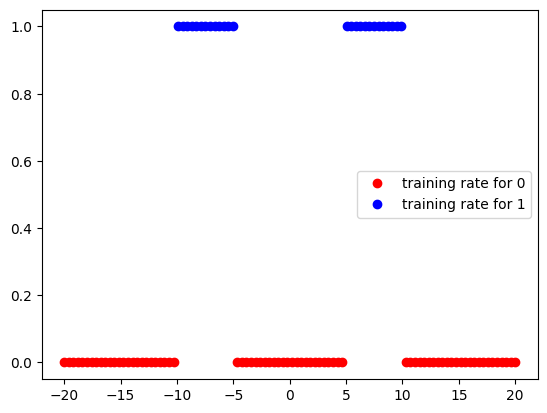

In [18]:
plotstuff(data_set.x,data_set.y,leg=False)

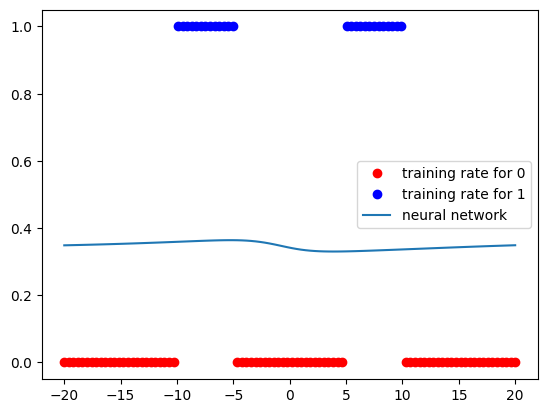

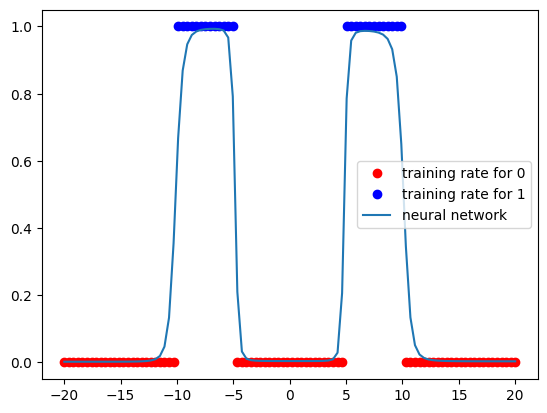

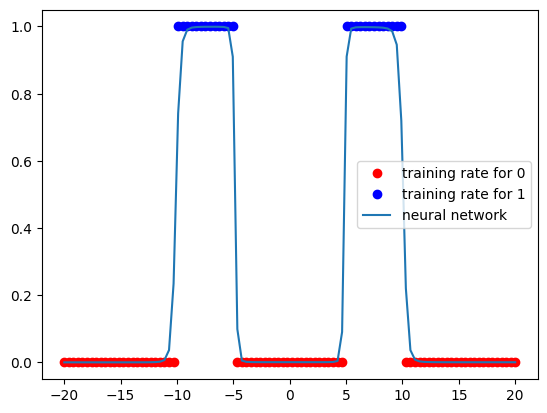

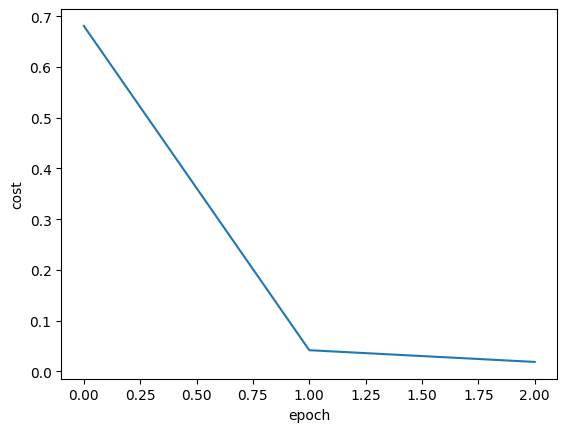

In [23]:
torch.manual_seed(0)
model = net(1,9,1)
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
train_loader = DataLoader(dataset=data_set,batch_size=100)
cost = train(data_set,model,criterion,train_loader,optimizer,epoch=600,plot_number=200)

# Practice using nn.Sequential 📋

In [ ]:
model= torch.nn.Sequential(
    torch.nn.Linear(1, 6), 
    torch.nn.Sigmoid(),
    torch.nn.Linear(6,1),
    torch.nn.Sigmoid()

)

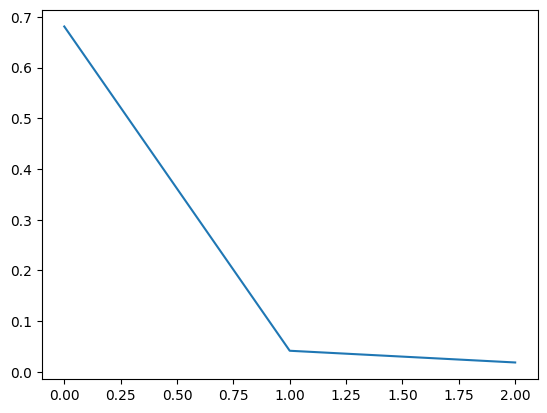

In [25]:
plt.plot(cost)